In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [82]:
import os
path = 'C:/Users/Abhishake Sing/Desktop/DevanagariHandwrittenCharacterDataset/Train/'
files = os.listdir(path)[10]
print(files)

classes = {'character_1_ka':0}#,'character_2_kha':1,'character_3_ga':2,'character_4_gha':3,'character_5_kna':4,'character_6_cha':5,'character_7_chha':6,'character_8_ja':7,'character_9_jha':8,'character_10_yna':9,'character_11_taamatar':10,'character_12_thaa':11,'character_13_daa':12,'character_14_dhaa':13,'character_15_adna':14,'character_16_tabala':15,'character_17_tha':16,'character_18_da':17,'character_19_dha':18,'character_20_na':19,'character_21_pa':20,'character_22_pha':21,'character_23_ba':22,'character_24_bha':23,'character_25_ma':24,'character_26_yaw':25,'character_27_ra':26,'character_28_la':27,'character_29_waw':28,'character_30_motosaw':29,'character_31_petchiryakha':30,'character_32_patalosaw':31,'character_33_ha':32,'character_34_chhya':33,'character_35_tra':34,'character_36_gya':35,'digit_0':36,'digit_1':37,'digit_2':38,'digit_3':39,'digit_4':40,'digit_5':41,'digit_6':42,'digit_7':43,'digit_8':44,'digit_9':45}

character_1_ka


In [83]:
import cv2

X = []
Y = []

for cl in classes:
    pth = path + cl
    print(pth)
    for img_name in os.listdir(pth):
        img = cv2.imread(pth+"/"+img_name,0)
        X.append(img)
        Y.append(classes[cl])

print("dataset created successfully! ")

C:/Users/Abhishake Sing/Desktop/DevanagariHandwrittenCharacterDataset/Train/character_1_ka
dataset created successfully! 


In [99]:
pd.Series(Y).value_counts()

0    1700
dtype: int64

In [85]:
X[0].shape

(32, 32)

In [86]:
print(type(X))
X = np.array(X)
y = np.array(Y)
print(type(X))

<class 'list'>
<class 'numpy.ndarray'>


0


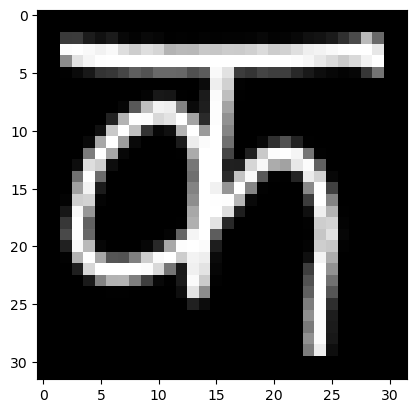

In [87]:
plt.imshow(X[100], cmap = 'gray')
print(Y[100])

In [88]:
X.shape

(1700, 32, 32)

In [89]:
X_new = X.reshape(len(X),-1)
print (X_new.shape)

(1700, 1024)


In [90]:
print(X.shape)
print(X.ndim)
print (X_new.ndim)

(1700, 32, 32)
3
2


In [91]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size = .20, random_state = 10)

In [92]:
print(x_train.shape)
print(x_test.shape)

(1360, 1024)
(340, 1024)


In [93]:
print(x_train.max())
print(x_test.max())
xtrain = x_train/255
xtest = x_test/255
print(xtrain.max())
print(xtest.max())

255
255
1.0
1.0


In [94]:
from sklearn.decomposition import PCA


print(xtrain.shape, xtest.shape)
pca = PCA(.98)
x_train = pca.fit_transform(xtest)
x_test = pca.transform(xtest)
print(x_train.shape, x_test.shape)
print(pca.n_components)
print(pca.n_features_)

(1360, 1024) (340, 1024)
(340, 161) (340, 161)
0.98
1024


In [97]:
y_test[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [98]:
log = LogisticRegression()
log.fit(x_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [340, 1360]